<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

###Выбор и исключение переменных

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [257]:
df = pd.read_csv("/content/possum.csv")
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [258]:
df = df.drop("case", axis=1).copy() # Ячейка номеров случаев, не интересует
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [259]:
df = df.dropna().copy()
# df.isna()
# Убрал строки 43 и 45 с незаполненным возрастом

In [260]:
# df.isnull()
# Нулевых тоже нет

In [261]:
df["age"] = df["age"].astype("int64")

df["hdlngth"] = df["hdlngth"].astype("float64")
df["skullw"] = df["skullw"].astype("float64")
df["totlngth"] = df["totlngth"].astype("float64")
df["taill"] = df["taill"].astype("float64")
df["footlgth"] = df["footlgth"].astype("float64")
df["earconch"] = df["earconch"].astype("float64")
df["eye"] = df["eye"].astype("float64")
df["chest"] = df["chest"].astype("float64")
df["belly"] = df["belly"].astype("float64")

df["Pop"] = df["Pop"].astype("category")
df["sex"] = df["sex"].astype("category")
df["site"] = df["site"].astype("category") # Будем считать, что зона, в которой обнаружен опосссум - категориальный признак

In [262]:
num_columns = df.select_dtypes(include=["float64"]).columns
cat_columns = df.select_dtypes(include=["category"]).columns
int_columns = df.select_dtypes(include=["int"]).columns

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числовая переменная для задачи регрессии);
2. С помощью EDA отобрать признаки, которые влияют на Y (можно определить графически, можно числами);
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо);
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее).

***Целевая переменная - Age***

####EDA

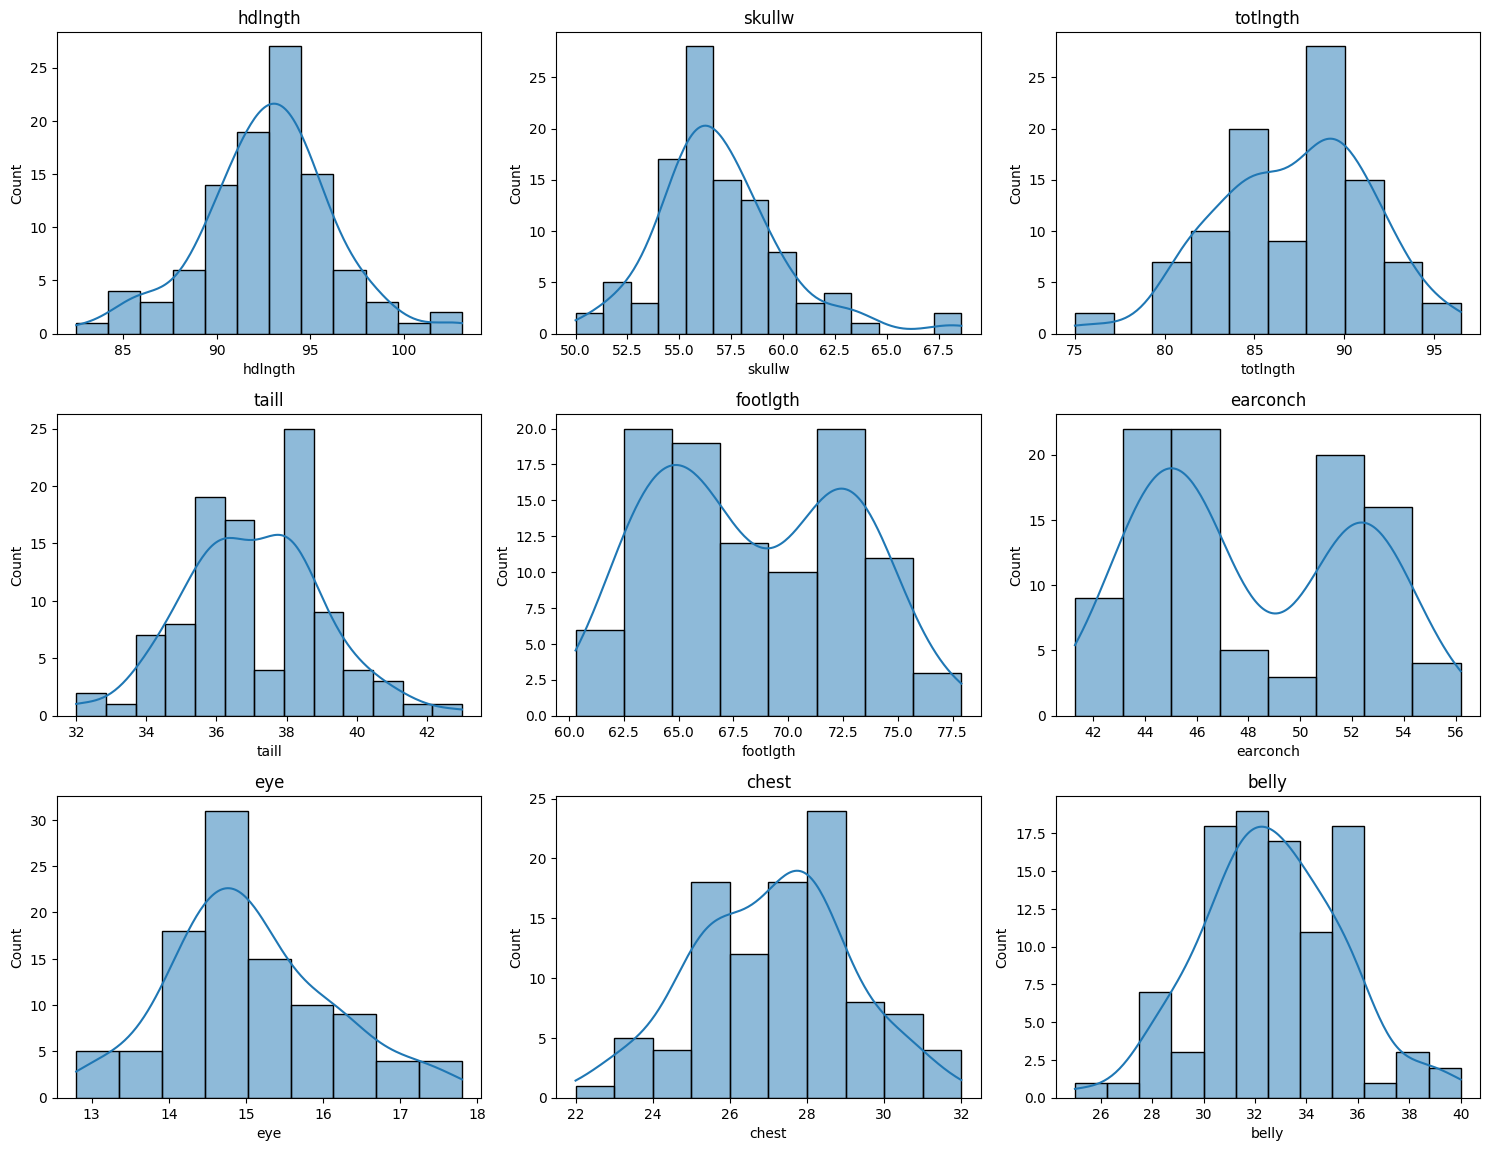

In [263]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(column)

plt.tight_layout()
plt.show()

Hdlngth, eye, chest, age, belly - более-менее нормальное распределение.

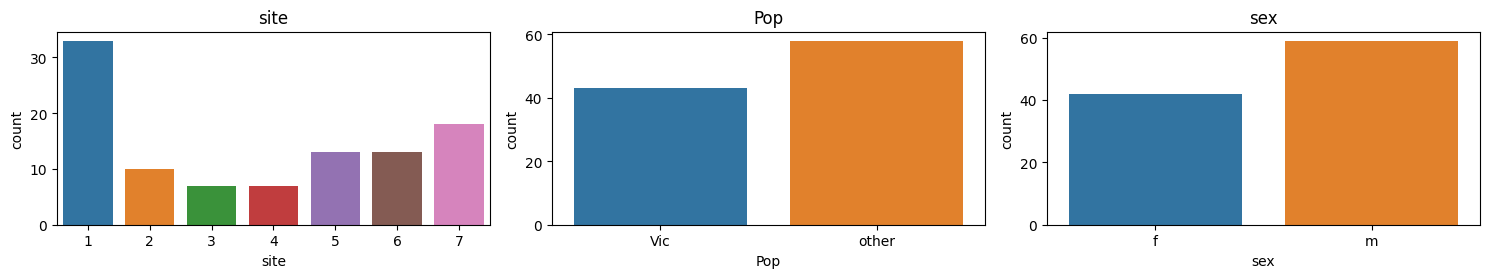

In [264]:
plt.figure(figsize=(15,10))

for i, column in enumerate(cat_columns, 1):
  plt.subplot(4, 3, i)
  sns.countplot(data=df, x=column)
  plt.title(column)

plt.tight_layout()
plt.show()

В первой зоне больше всего опоссумов, походу там зоопарк.

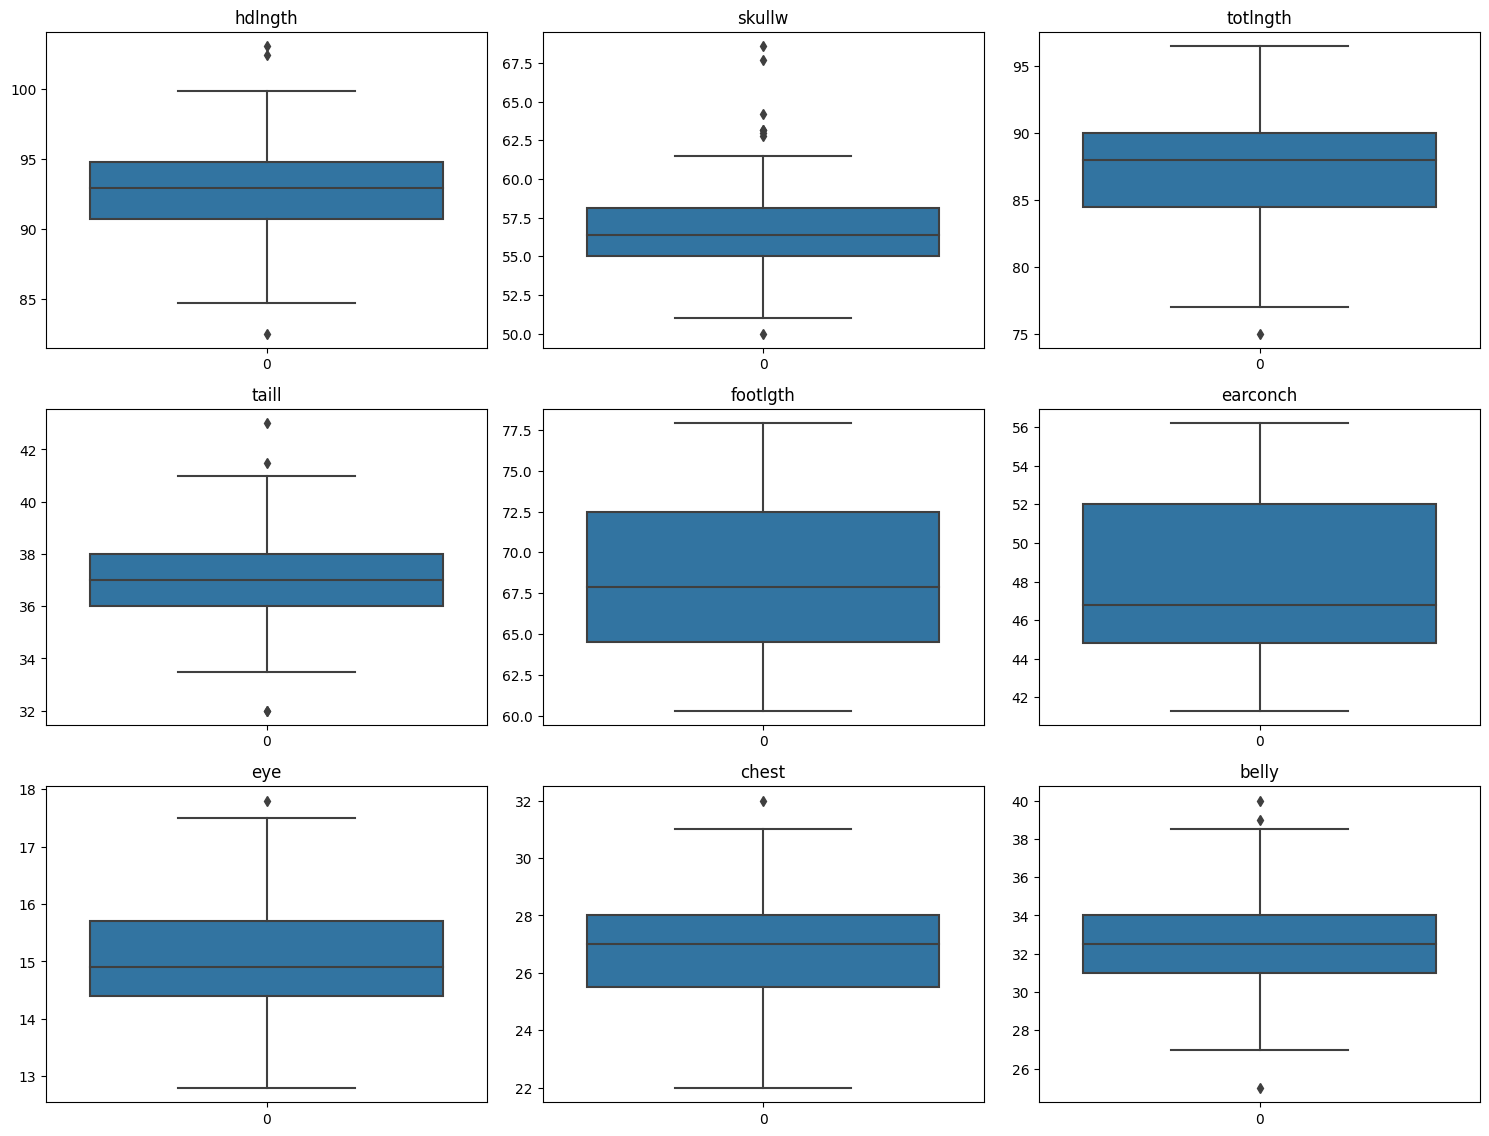

In [265]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  sns.boxplot(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

В skullw больше всего аномальных значений, но в целом - жить можно.

In [266]:
'''for i, column in enumerate(num_columns, 1):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  df_IQR = df[column].copy()
  df_IQR = df_IQR[(df_IQR > (Q1-1.5*IQR )) & (df_IQR < (Q3+1.5*IQR))]
  df[column] = df_IQR.copy()
  df[column] = df[column].fillna(df[column].mean()).copy()'''

'for i, column in enumerate(num_columns, 1):\n  Q1 = df[column].quantile(0.25)\n  Q3 = df[column].quantile(0.75)\n  IQR = Q3 - Q1\n  df_IQR = df[column].copy()\n  df_IQR = df_IQR[(df_IQR > (Q1-1.5*IQR )) & (df_IQR < (Q3+1.5*IQR))]\n  df[column] = df_IQR.copy()\n  df[column] = df[column].fillna(df[column].mean()).copy()'

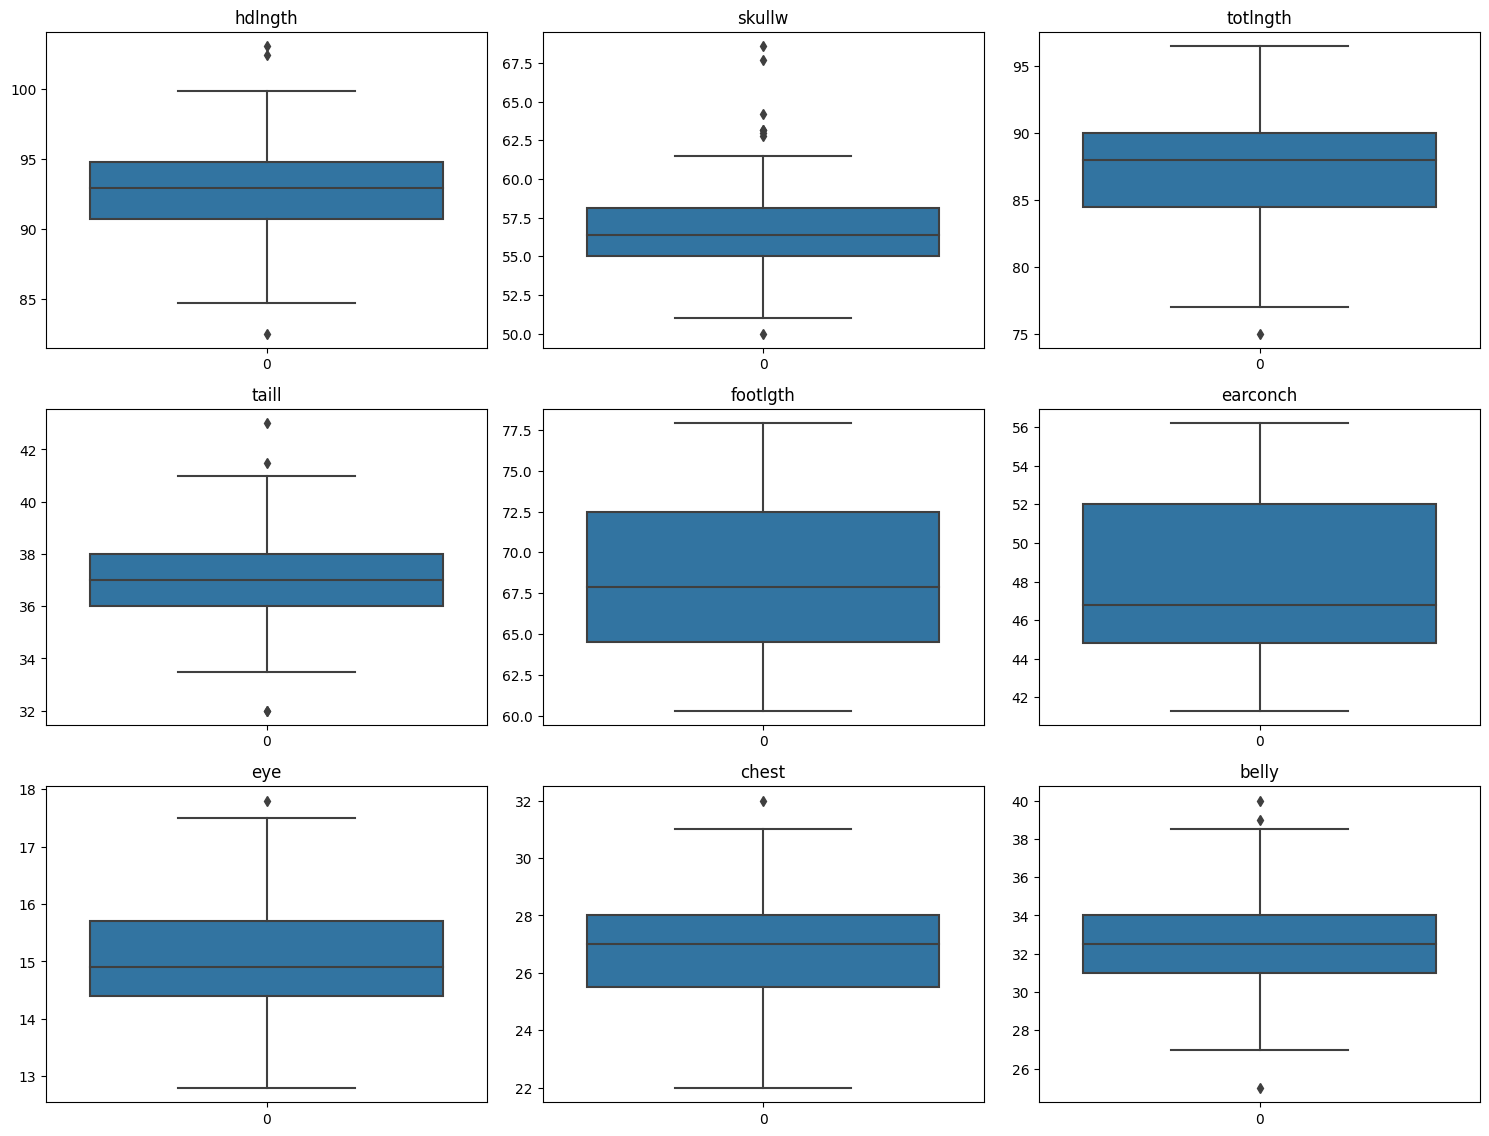

In [267]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  sns.boxplot(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

Выбросы отчищены

<Axes: >

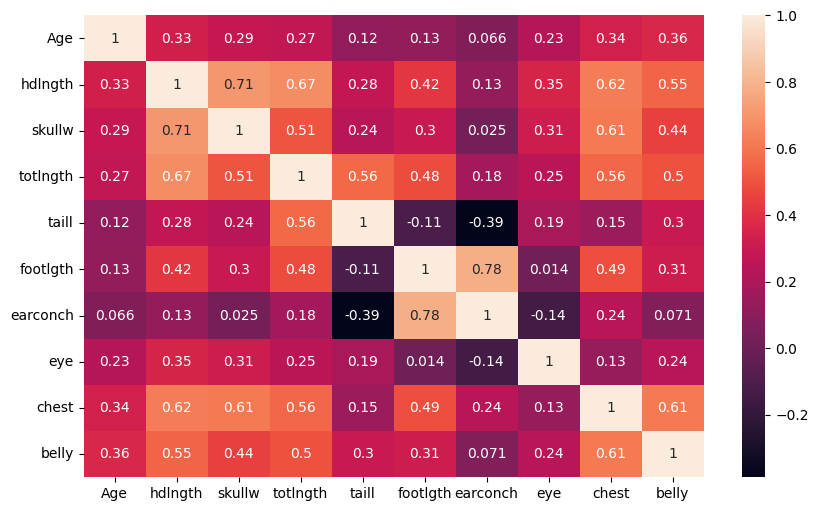

In [268]:
corr_matrix = pd.DataFrame({
    "Age": df["age"],
    "hdlngth": df["hdlngth"],
    "skullw": df["skullw"],
    "totlngth": df["totlngth"],
    "taill": df["taill"],
    "footlgth": df["footlgth"],
    "earconch": df["earconch"],
    "eye": df["eye"],
    "chest": df["chest"],
    "belly": df["belly"]
}).corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)

Больше всего с age коррелируют hdlngth и skullw, также можно взять chest и belly

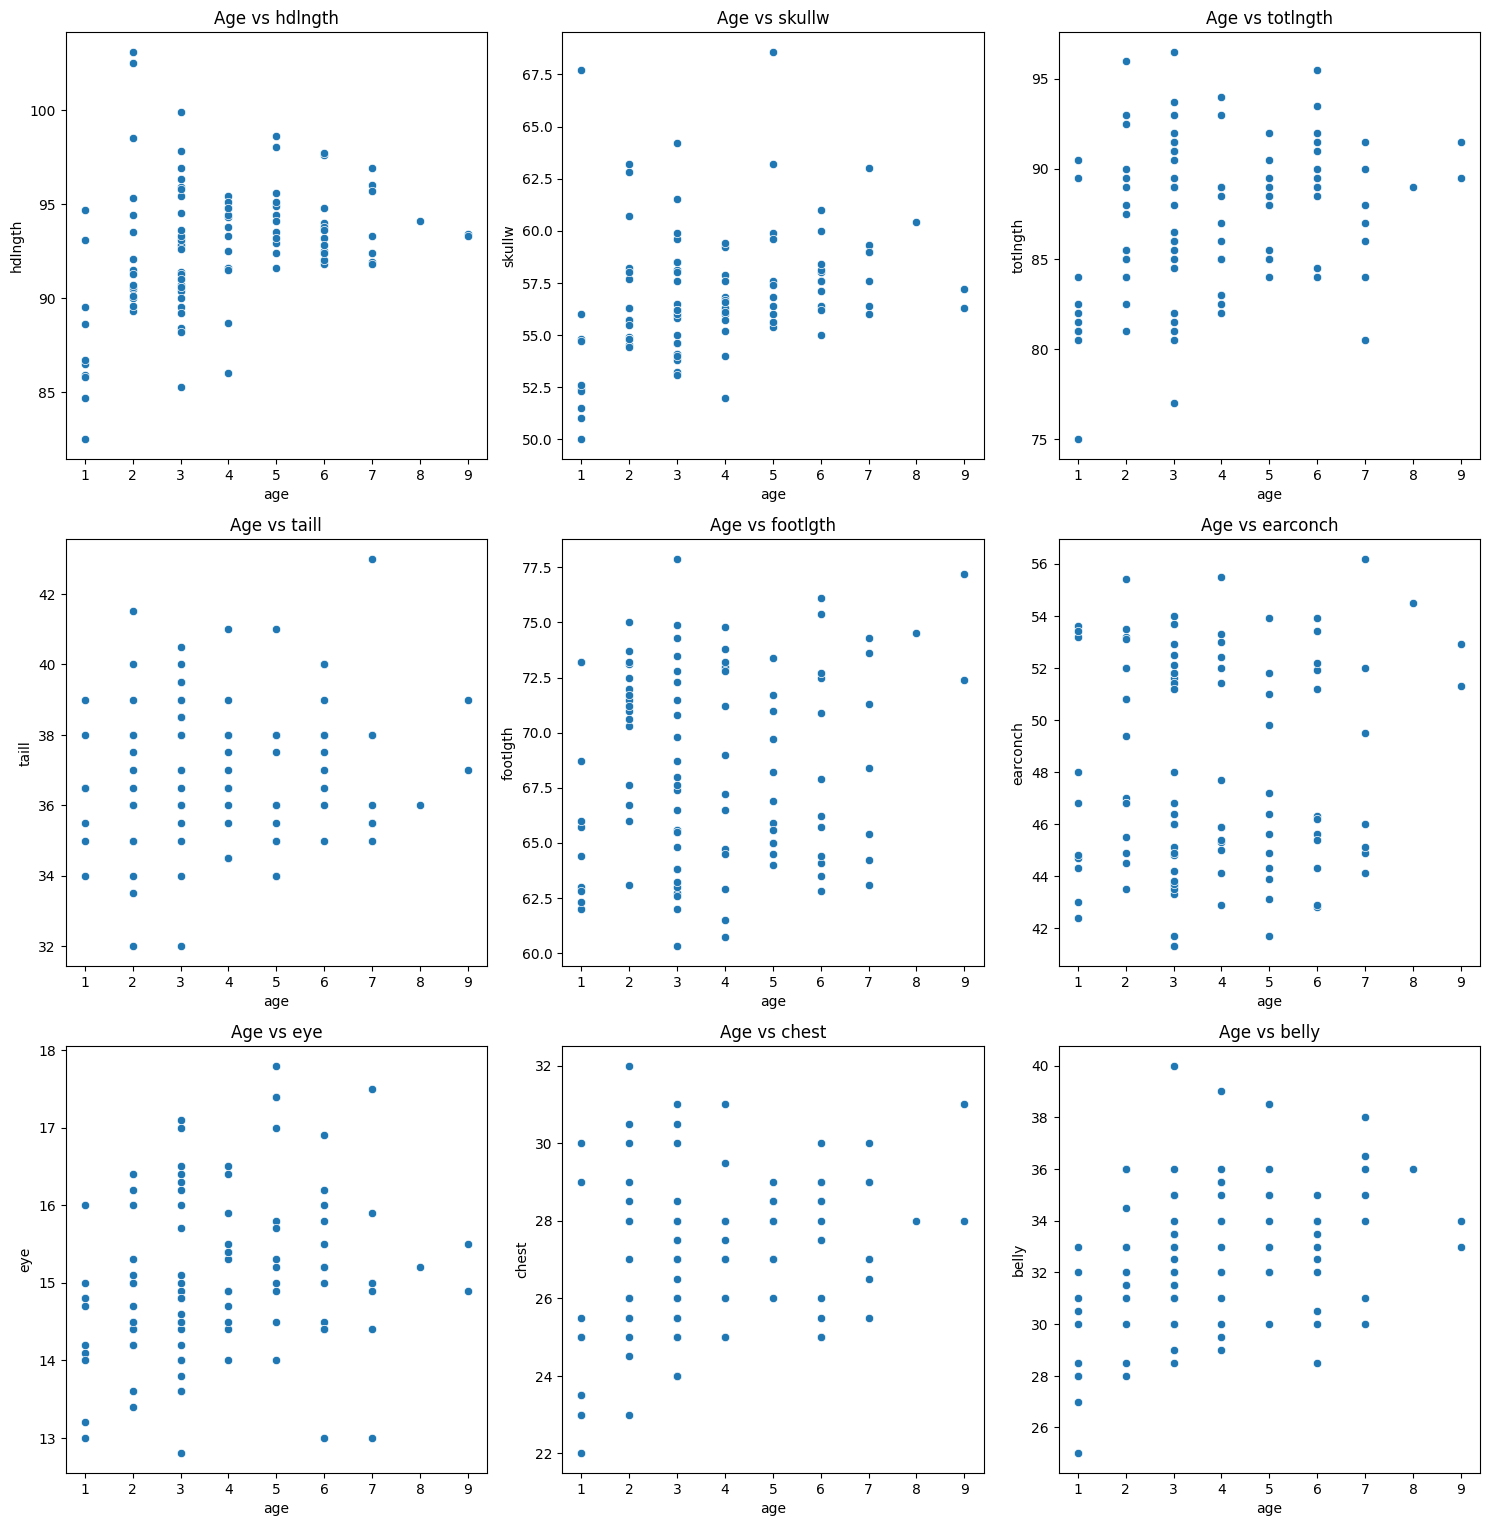

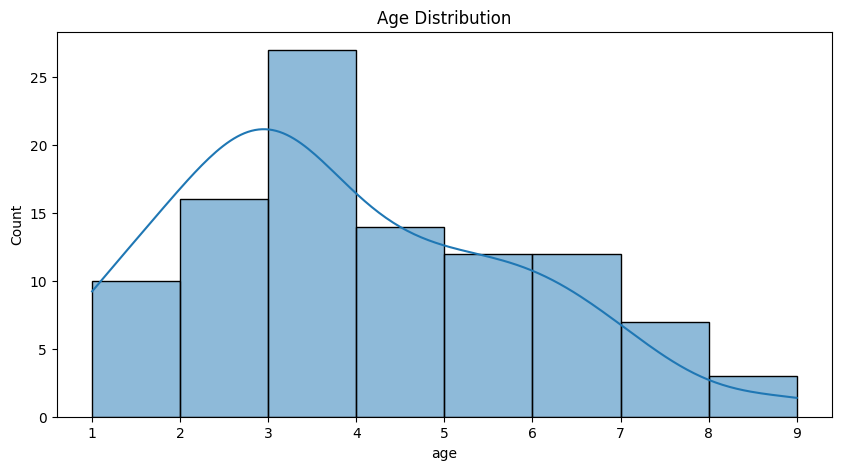

In [269]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x="age", y=column)
    plt.title(f'Age vs {column}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="age", kde=True)
plt.title("Age Distribution")
plt.show()

#### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [270]:
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[num_columns] = scaler.fit_transform(df[num_columns])
df[num_columns] = df_scaled[num_columns].copy()

In [271]:
encoder = OneHotEncoder()

for i, column in enumerate(cat_columns, 1):
  transformed = encoder.fit_transform(df[[column]])
  df[encoder.categories_[0]] = transformed.toarray()
df = df.drop(columns=cat_columns).copy()
df = df.rename(columns={1: "site_1", 2: "site_2", 3: "site_3", 4: "site_4",
                        5: "site_5", 6: "site_6", 7: "site_7", "Vic": "Vic_population",
                        "other": "other_population", "f": "sex_female", "m": "sex_male"}).copy()
                        # Пофикшены некрасивости работы энкодера
df

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,...,site_2,site_3,site_4,site_5,site_6,site_7,Vic_population,other_population,sex_female,sex_male
0,8,0.563107,0.559140,0.651163,0.363636,0.806818,0.885906,0.48,0.60,0.733333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,6,0.485437,0.408602,0.767442,0.409091,0.693182,0.664430,0.64,0.65,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,6,0.558252,0.537634,0.953488,0.636364,0.857955,0.711409,0.54,0.80,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,6,0.519417,0.381720,0.790698,0.545455,0.897727,0.731544,0.48,0.60,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2,0.436893,0.338710,0.488372,0.363636,0.607955,0.798658,0.46,0.65,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,0.339806,0.322581,0.302326,0.409091,0.323864,0.369128,0.40,0.10,0.133333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
100,1,0.296117,0.252688,0.348837,0.636364,0.232955,0.449664,0.24,0.30,0.533333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
101,6,0.480583,0.268817,0.651163,0.545455,0.181818,0.275168,0.04,0.30,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
102,4,0.436893,0.279570,0.348837,0.409091,0.147727,0.308725,0.52,0.30,0.266667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

X = df[["hdlngth", "skullw", "chest", "belly", "site_1", "site_2", "site_3", "site_4",
       "site_5", "site_6", "site_7", "Vic_population", "other_population",
       "sex_female", "sex_male"]]
y = df["age"]

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  model = LinearRegression()
  model.fit(X, y)
  return model


def compute_metrics(y, predicted):
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [282]:
model = compute_regression(X_train, y_train)
y_pred = model.predict(X)

compute_metrics(y, y_pred)

{'MAE': 1.3166379142911089,
 'MSE': 2.8053595188219385,
 'R2': 0.22751518513462743,
 'mape (reverted - % верно угаданых)': 52.835441580127394,
 'mape (original - % ошибок)': 47.164558419872606}

In [283]:
pd.DataFrame({'y': y, 'y_pred': y_pred})

,y,y_pred
0,8,4.470474
1,6,3.842210
2,6,4.471127
3,6,3.970183
4,2,3.617024
...,...,...
99,1,2.213009
100,1,2.884484
101,6,3.157216
102,4,2.856223


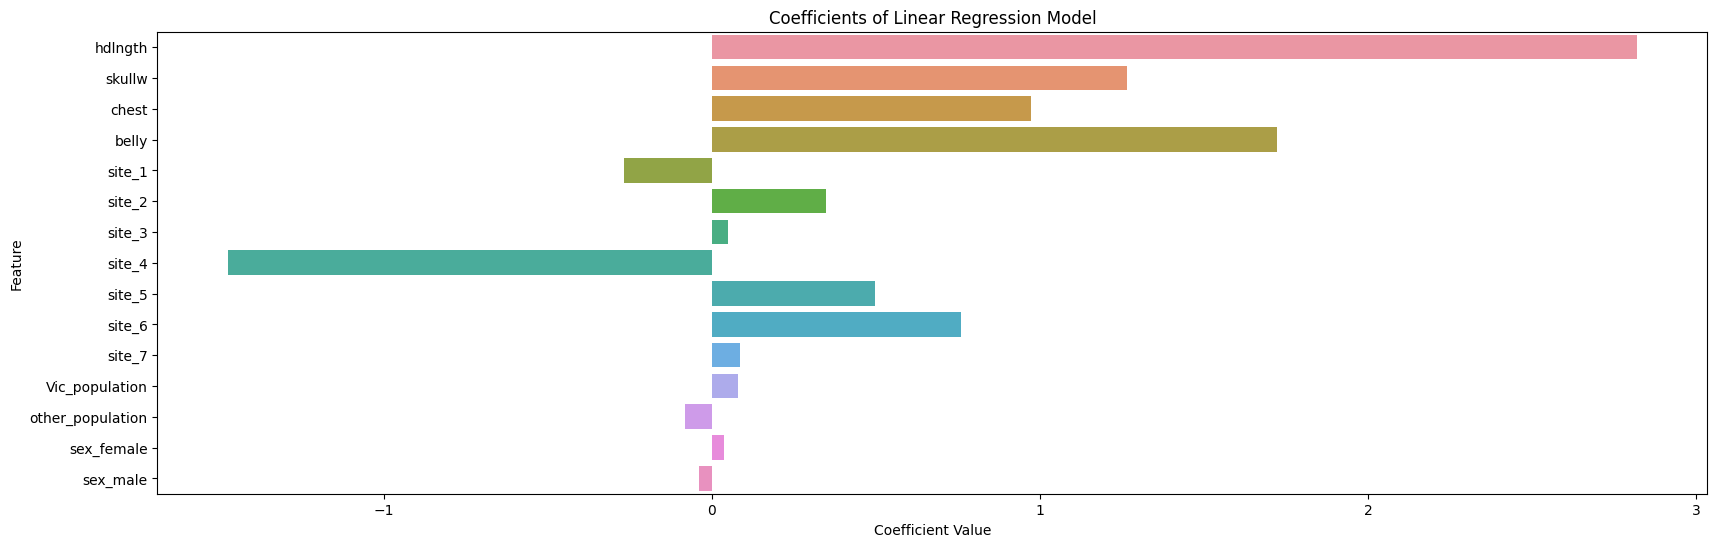

In [278]:
plt.figure(figsize=(20, 6))
sns.barplot(x=model.coef_, y=X.columns)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [285]:
model = compute_regression(X_train, y_train)
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 1.4068188955762564,
 'MSE': 3.373529739055825,
 'R2': 0.25389838770129447,
 'mape (reverted - % верно угаданых)': 50.748403792996264,
 'mape (original - % ошибок)': 49.251596207003736}

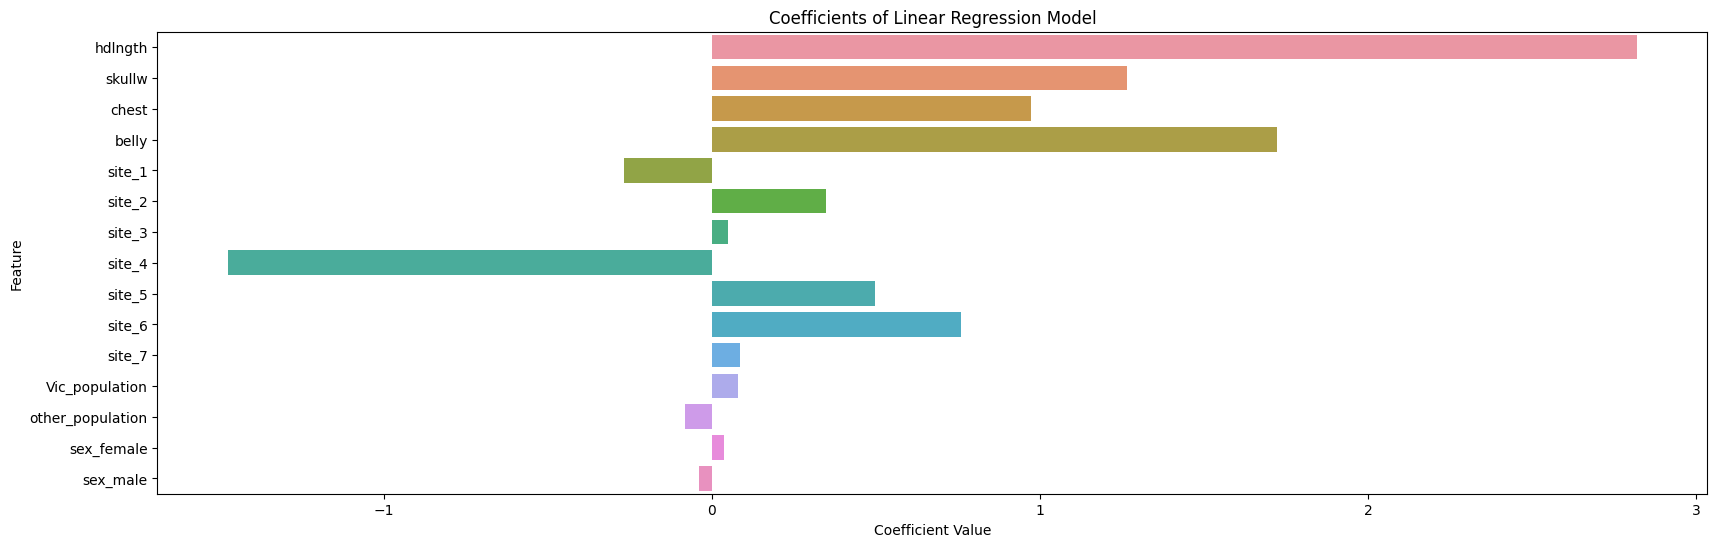

In [286]:
plt.figure(figsize=(20, 6))
sns.barplot(x=model.coef_, y=X.columns)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

4 площадка оказывает сильное влияние на результат